# **Week 8: Maximising entropy of mixing of ideal gases**

<br>

In this exercise, we delve into the concept of maximizing the entropy of mixing for ideal gases through two distinct optimization models.

<br>

> ### **Introduction to Mixing Entropy:**

<br>

When an ideal gas undergoes a volume change, the corresponding change in entropy can be described using the formula:

$$ \Delta S = nR\log(\frac{V_{f}}{V_{i}})\tag{Equation 1.} $$

> where $ V_{i} $  and $ V_{f} $ are the initial and final volumes respectively, $R$ is the ideal gas constant, and $n$ is the number of moles.

Consider a system with two gases, $A$ and $B$, separated by a partition. The entropy change for gas  $A$ occurs as it can now occupy the entire volume of the system:

$$ \Delta S_{A} = n_{A}R\log(\frac{V_{A}+V_{B}}{V_{A}})\tag{Equation 2.} $$

Assuming equal temperature $T$ and pressure $P$ for all gases and using the ideal gas law, we can express this in terms of the number of moles:

$$ \Delta S_{A} = n_{A}R\log(\frac{n_{A}+n_{B}}{n_{A}})\tag{Equation 3.} $$


The entropy of mixing, denoted as $ \Delta S_{mix} $ , is the sum of entropy changes for all gases in the system. For a two-gas system, it is given by:

$$ \Delta S_{mix} = \Delta S_{A} + \Delta S_{B} = -(n_{A}R\log(\frac{n_{A}}{N_{tot}}) + n_{B}R\log(\frac{n_{b}}{N_{tot}}))\tag{Equation 4.} $$

Expressing this in terms of the molar fraction $\chi$ of each gas:

$$ \Delta S_{mix}  = -N_{tot}R(\chi_{A}\log(\chi_{A}) + \chi_{B}\log(\chi_{B})\tag{Equation 5.} $$

> where the molar fraction $\chi$ of each gas is defined as the ratio between the number of moles of such gas and the total number of moles in our system.

Generalizing for a system of $N$ partitioned gases, we arrive at:

$$ \Delta S_{mix}  = \sum_{i}^{N}  -N_{tot}R(\chi_{i}\log(\chi_{i}))\tag{Equation 6.} $$

In this exercise, assume $N_{tot}R=1$

<br>
<br>
<br>
<br>


> ### **Introduction to Steepest Descent:**

<br>


1. **Steepest Descent Optimization:**

    - The steepest descent optimization algorithm updates the current point $\mathbf{x}$ iteratively based on the gradient:

$$ \mathbf{x}_{\text{new}} = \mathbf{x}_{\text{current}} - \alpha \nabla f(\mathbf{x}_{\text{current}}) \tag{Equation 7.} $$

> where $\alpha$ is the learning rate or step size, and  $\mathbf{x}_{\text{current}}$ is the current position vector, which will be updated into  $\mathbf{x}_{\text{new}}$

2. **Convergence Criterion**
    - The optimization stops when the change in the point is below a specified threshold ($\epsilon$):

$$ \lVert \mathbf{x}_{\text{new}} - \mathbf{x}_{\text{current}} \rVert < \epsilon \tag{Equation 8.} $$

3. **Stopping Criteria**
    - The optimization also has a maximum number of iterations to prevent infinite looping:

$$ \text{iteration} <  \mathbf{max\_iterations} \tag{Equation 9.} $$


##### **For this exercise, use the following parameters:**

$$\alpha=0.1, \epsilon=0.01, \mathbf{max\_iterations}=100$$

<br>
<br>
<br>
<br>
<br>


# **Task 1:**

The first task is to implement three functions which will perform a steepest descent search on an N dimensional function, and to generate a plot which illustrates the gradient descent optimization process for a two-gas system.

1. **Define the objective function `objective_function`:**
    - This function must take in a numpy array of the position vector in N-dimensional space (N molar fractions).
    - This function must return a float of the entropy.
    - This is a function that must be minimised, so take proper care, since we want to maximise the entropy of mixing

<br>

2. **Define the function `gradient`:**
    - This function must take in `x`, a numpy array of the position vector in N-dimensional space (N molar fractions).
    - This function must return a numpy array of the gradient vector in N-dimensional space.

<br>

3. **Define the function `steepest_descent`:**
    - This function must take `x` in a numpy array of the initial guess vector in N-dimensional space (N molar fractions).
    - This function must take the parameters `alpha` (float), `epsilon`  (float) and `max_iterations` (integer) required to implement the optimization.
    - This function must implement the steepest descent algorithm as outlined below.
    - This function must return a numpy array containting the optimization path through N-dimensional space.

<br>

4. **Run the model and plot the process for a two-gas system:**
    - You must run the implemented gradient descent model for a two-gas system.
    - Generate a 2D figure showing the contours of our objective function, initial and optimal points, and the optimization path. 
    - As usual, label your figure accordingly.


In [228]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator

In [229]:
def objective_function(x) -> float: #N_tot * R = 1
    return -np.sum(x * np.log(x))

v_objective_function = np.vectorize(objective_function)

#def gradient(x) -> np.ndarray:
#    return np.gradient(x)

def steepest_descent(initial_point, alpha, epsilon, max_iterations) -> np.ndarray:
    x_path = [initial_point]
    x_new = initial_point - alpha * np.gradient(initial_point)
    x_path.append(x_new)
    x_current = x_new
    iteration = 1
    while (np.abs(x_new - x_current).max() < epsilon) and (iteration <= max_iterations):
        iteration += 1
        x_new = x_current - alpha * np.gradient(x_current)
        x_path.append(x_new)
        x_current = x_new
    x_path = np.array(x_path)
    return x_path

In [230]:
#np.random.seed(42)
#a = np.random.uniform(0, 1)
# Let x_a and x_b be random and not add up to 1
initial_point = np.random.uniform(0, 1, 2)

s = []
x = steepest_descent(initial_point=initial_point, alpha=0.01, epsilon=0.01, max_iterations=200)
for idx, arr in enumerate(x):
    s.append(objective_function(arr))
s = np.array(s)[~np.isnan(np.array(s))]

/var/folders/0n/qlsqbkfj2dl5v4_hj0l1288h0000gn/T/ipykernel_74831/1263616001.py:2: RuntimeWarning: invalid value encountered in log
  return -np.sum(x * np.log(x))


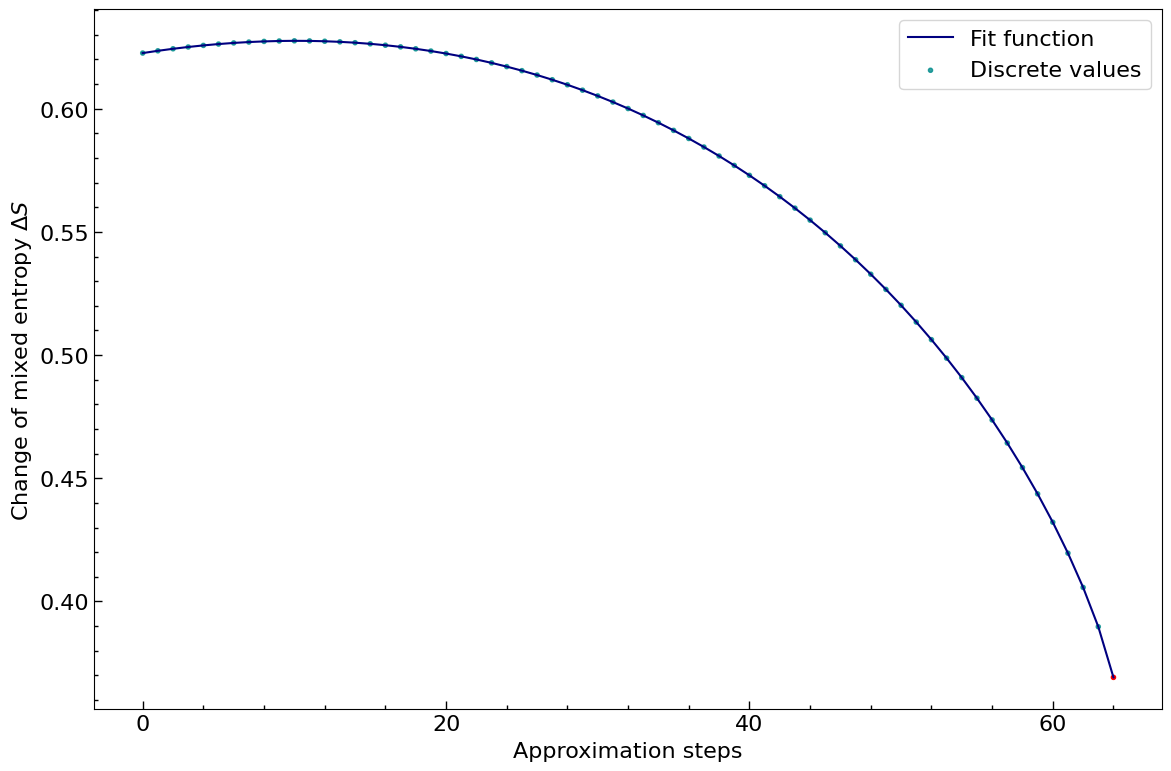

In [231]:
fig, ax = plt.subplots(nrows=1, ncols=1, tight_layout=True, figsize=(12,8))
font_params = {
    'font.family': 'sans-serif',
    'font.serif': 'Helvetica',
    'font.size': 16,
    'font.weight': 'normal',
}
plt.rcParams.update(font_params)
ax.plot(np.arange(0, len(s), 1), s, label=r"Fit function", color='navy')
ax.scatter(np.arange(0, len(s), 1), s, label=r"Discrete values", color=['darkcyan' if i < len(s) - 1 else 'red' for i in range(len(s))], alpha=[0.8 if i < len(s) - 1 else 1 for i in range(len(s))], marker='.')

ax.xaxis.set_major_locator(MultipleLocator(20))
ax.xaxis.set_minor_locator(MultipleLocator(4))
ax.yaxis.set_major_locator(MultipleLocator(0.05))
ax.yaxis.set_minor_locator(MultipleLocator(0.01))
ax.tick_params(direction='in', which='both', width=1)
ax.tick_params(which='major', length=6)
ax.tick_params(which='minor', length=3)

ax.set_xlabel("Approximation steps", labelpad=5)
ax.set_ylabel(r"Change of mixed entropy $\Delta S$")

plt.legend()

#fig.savefig('DeltaS.png', bbox_inches='tight', format='png', dpi=600)

# **Task 2:**

As you may have noticed, the optimal point we obtained in the previous task has an issue.
It is not a physical solution, the molar fractions of the components do not add up to 1!
Therefore we must implement constraints to our algorithm, limiting the search space.

$$  \sum_{i}^{} \chi_{i} = 1 \tag{Equation 10.} $$

> Note: Constraints are stated in the form $g(x)=0$

The second task is to implement two functions, and to use them to perform a constrained optimization in a ten gas system.

<br>

1. **Define the objective function `objective_function`:**
    - This function must take in a numpy array of the position vector in N-dimensional space (N molar fractions).
    - This function must return a float of the entropy.
    - This is a function that must be minimised, so take proper care, since we want to maximise the entropy of mixing

<br>


2. **Define the function `constraint_sum_to_one`:**
    - This function must take in `x`, a numpy array of the position vector in N-dimensional space (N molar fractions).
    - This function must return the contraint statement $g(x)$ obtained from equation 10.

<br>


4. **Perform the constrained optimization and print the output of the optimization process:**
    - You must run the constrained optimization for a system of ten gases.
> Hint: Make use of scipy's `minimize` tool.


    - Print out the output of the optimization model.


In [232]:
from scipy.optimize import minimize

In [233]:
def objective_function(x):
    return -np.sum(x * np.log(x))


def constraint_sum_to_one(x):
    return np.sum(x) - 1

N = 2  # Number of gases
initial_guess = np.ones(N) / N  # Equal molar fractions as an initial guess
constraints = [{'type': 'eq', 'fun': constraint_sum_to_one}]
result = minimize(objective_function, initial_guess, constraints=constraints)
print("Optimization Result:")
print(result)

Optimization Result:
 message: Optimization terminated successfully
 success: True
  status: 0
     fun: 0.6931471805599453
       x: [ 5.000e-01  5.000e-01]
     nit: 1
     jac: [-3.069e-01 -3.069e-01]
    nfev: 3
    njev: 1
